# Probabilistic Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from volumetricspy import ProbVar, MonteCarlo

## Constant Values

In [2]:
x = ProbVar(name='test1',constant=5.)
x.get_sample()

5.0

<AxesSubplot:ylabel='Count'>

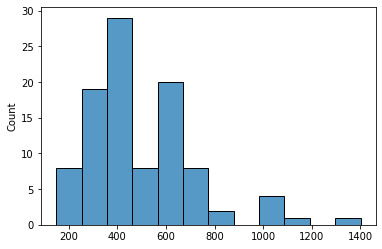

In [3]:
y = ProbVar(
    name = 'test',
    dist = 'lognorm', 
    kw = {'s':0.42, 'scale':500})

sns.histplot(y.get_sample(size=100))

In [4]:
def ooip(a,h,bo,phi,sw):
    return 7758*a*h*phi*(1-sw)*(1/bo)*(1/1000000)

In [5]:
a = ProbVar(name = 'area',dist='norm',kw={'loc':1000,'scale':200})
h = ProbVar(name = 'height',dist='uniform',kw={'loc':180,'scale':70})
bo = ProbVar(name = 'bo',constant=1.12)
phi = ProbVar(name = 'phi',dist='norm',kw={'loc':0.18,'scale':0.04})
sw = ProbVar(name = 'sw',dist='norm',kw={'loc':0.4,'scale':0.1})

In [6]:
OOIP = MonteCarlo(
    name = 'OOIP',
    func = ooip,
    args = [a,h,bo,phi,sw],
)

<AxesSubplot:ylabel='Count'>

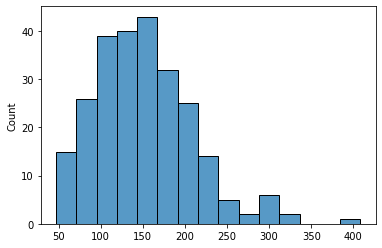

In [7]:
ss = OOIP.get_sample(size=250)

sns.histplot(ss)

In [8]:
ooip_df = OOIP.get_sample_df(size=10)
ooip_df

,area,height,bo,phi,sw,OOIP
0,925.651164,236.219920,1.12,0.054079,0.387532,50.165557
1,1349.125898,240.997838,1.12,0.188264,0.421510,245.278578
2,921.932967,248.303226,1.12,0.255274,0.367952,255.840605
3,745.707912,198.815503,1.12,0.169090,0.521027,83.172502
4,848.029361,200.931210,1.12,0.153764,0.515933,87.851647
5,1253.576649,202.553816,1.12,0.242674,0.242814,323.183720
6,804.690999,208.950491,1.12,0.183487,0.608677,83.626757
7,1230.468831,236.937588,1.12,0.151678,0.355835,197.313430
8,710.347295,217.855698,1.12,0.192355,0.303205,143.674447
9,1180.073563,247.931515,1.12,0.151773,0.328107,206.665682


<AxesSubplot:xlabel='area', ylabel='Count'>

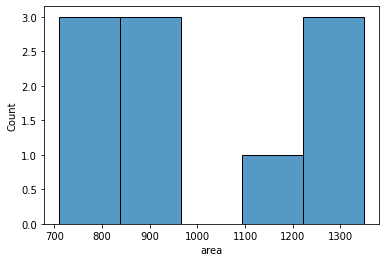

In [9]:
sns.histplot(ooip_df['area'])

In [10]:
OOIP.get_sample_df(ppf=np.linspace(0.05,0.95,10))

,area,height,bo,phi,sw,OOIP
0.05,671.029275,183.5,1.12,0.114206,0.235515,74.467510
0.15,792.713322,190.5,1.12,0.138543,0.296357,101.971547
0.25,865.102050,197.5,1.12,0.153020,0.332551,120.874204
0.35,922.935907,204.5,1.12,0.164587,0.361468,137.396387
0.45,974.867731,211.5,1.12,0.174974,0.387434,153.078147
0.55,1025.132269,218.5,1.12,0.185026,0.412566,168.638179
0.65,1077.064093,225.5,1.12,0.195413,0.438532,184.585622
0.75,1134.897950,232.5,1.12,0.206980,0.467449,201.465306
0.85,1207.286678,239.5,1.12,0.221457,0.503643,220.156546
0.95,1328.970725,246.5,1.12,0.245794,0.564485,242.906077
